In [1]:
import numpy as np 
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

# Read dataset

In [3]:
data = pd.read_csv("house_prices_dataset.csv")
data

,area,price
0,2231.88,558852.17
1,2524.92,632260.29
2,1527.65,382994.25
3,1986.09,497607.86
4,2920.16,730870.84
...,...,...
95,2345.42,587342.25
96,1701.95,426321.81
97,2880.39,721159.46
98,2273.60,569238.36


In [5]:
data.head(2)

,area,price
0,2231.88,558852.17
1,2524.92,632260.29


In [6]:
data.tail(2)

,area,price
98,2273.60,569238.36
99,2923.85,732054.33


In [7]:
data.dtypes

area     float64
price    float64
dtype: object

# Explore and clean the data. Handle missing values and outliers

In [8]:
data.describe()

,area,price
count,100.00000,100.000000
mean,2247.97960,562990.340700
std,453.86445,113464.467239
min,1522.16000,381657.070000
25%,1812.84750,454164.525000
50%,2284.15000,571887.305000
75%,2617.72750,655407.227500
max,2995.40000,749686.490000


In [9]:
data.isna().sum()

area     0
price    0
dtype: int64

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

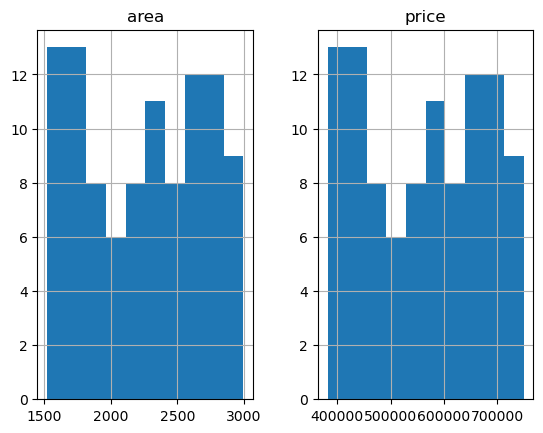

In [10]:
data.hist()

# Assigning X = input features and Y = Response feature

In [11]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [12]:
x.head(2)

,area
0,2231.88
1,2524.92


In [13]:
y.head(2)

,price
0,558852.17
1,632260.29


In [14]:
type(x)

pandas.core.frame.DataFrame

In [15]:
type(y)

pandas.core.frame.DataFrame

In [16]:
data.corr()

,area,price
area,1.0,1.0
price,1.0,1.0


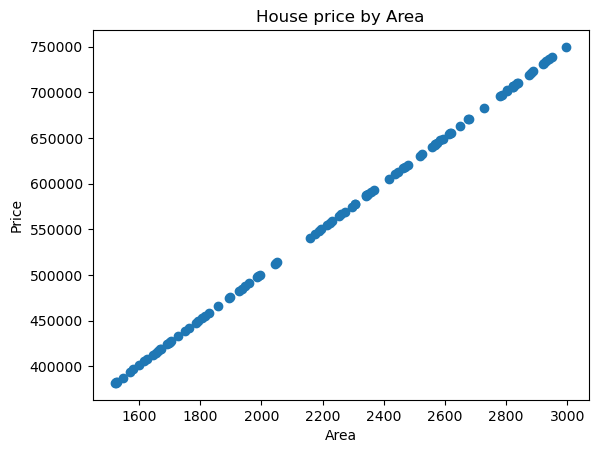

In [17]:
# Visualise the dataset

plt.scatter(x,y)
plt.title("House price by Area")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

# Split the data into training and testing dataset

In [18]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 10)


In [20]:
xtrain.shape

(80, 1)

In [21]:
xtest.shape

(20, 1)

# Build model with Simple linear regression

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
print("Training started")
print()
lin_reg.fit(xtrain,ytrain)
print("Training completed")
print()
print("Testing started")
print()
ypred = lin_reg.predict(xtest)
print()
print("Predicted Price is \t",ypred)
print()
print("Testing closed")

Training started

Training completed

Testing started


Predicted Price is 	 [[544740.95404935]
 [722951.45121655]
 [454699.43971951]
 [513862.93473882]
 [670375.56698853]
 [497510.15971574]
 [465697.12468   ]
 [654057.79255409]
 [618594.69613114]
 [586876.66269315]
 [382898.23215751]
 [632219.92528201]
 [424286.42822954]
 [706258.67047521]
 [587344.17055576]
 [414608.76546936]
 [418461.33026229]
 [498500.17636597]
 [482484.90701909]
 [663267.94745166]]

Testing closed


# Visualizing training dataset

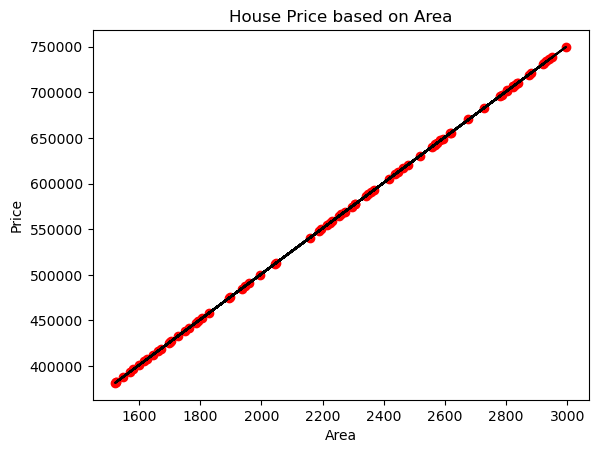

In [28]:
plt.scatter(xtrain,ytrain,color = 'red')
plt.plot(xtrain,lin_reg.predict(xtrain),color='black')
plt.title("House Price based on Area")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

# Visualizing testing dataset

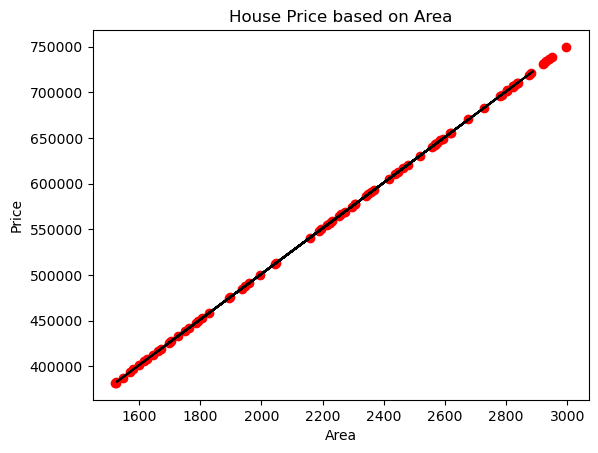

In [29]:
plt.scatter(xtrain,ytrain,color = 'red')
plt.plot(xtest,lin_reg.predict(xtest),color='black')
plt.title("House Price based on Area")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

# Predict Unseen data 

In [34]:
# Get user input for the area
area = int(input("Enter the area: "))

# Predict the price for the entered area
unseen_pred = lin_reg.predict(np.array([[area]]))

print("Predicted price for the entered area is:", unseen_pred)

Enter the area: 1940
Predicted price for the entered area is: [[485987.46592558]]


C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Parameters

In [35]:
print("Coefficient/Slope: \t",lin_reg.coef_)
print()
print("Intercept/Constant: \t",lin_reg.intercept_)

Coefficient/Slope: 	 [[250.0042046]]

Intercept/Constant: 	 [979.30899563]


# Performace metrics

In [36]:
from sklearn.metrics import r2_score
print("R squared value is :\t ", r2_score(ytest,ypred))

R squared value is :	  0.9999991726829518


In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("Mean Absolute error\t", mean_absolute_error(ytest,ypred))
print()
print("Mean Squared error\t", mean_squared_error(ytest,ypred))
print()
print("Root Mean Squared error \t", np.sqrt(mean_squared_error(ytest,ypred)))
print()

Mean Absolute error	 77.02151574788441

Mean Squared error	 8823.499863004563

Root Mean Squared error 	 93.93348637735407



# Saving trained model(Deployable Object)

# Pickle mehtod

In [44]:
import pickle

with open('model_pkl','wb') as file:
    pickle.dump(lin_reg,file)

In [45]:
with open('model_pkl','rb') as f:
    deploy_slr = pickle.load(f)

In [47]:
deploy_slr.predict([[1940]])

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[485987.46592558]])

# Joblib Method

In [49]:
import joblib

joblib.dump(lin_reg,'model_jkl')
deploy_mlr = joblib.load('model_jkl')

In [50]:
deploy_mlr.predict([[1940]])

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[485987.46592558]])

In [ ]:
S